In [1]:
import urllib.request, urllib.parse, urllib.error
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Here is the URL to our API. It has the year inserted in, as well as the API key. (Is there a reason to keep the API
#key in a different variable and then go from there? Or is the only reason for if we needed to change the year in the
#Middle of the URL and construct the URL in pieces because of that?)

url = 'https://api.sportsdata.io/v3/nfl/stats/json/PlayerSeasonStats/2020?key=d4109271ac4b4e508909f4920961c3ad'

In [3]:
#Let's open the page. This should pull all our 2020 season stats

uh = urllib.request.urlopen(url)

In [4]:
#Read the data

data=uh.read()

In [5]:
#Get it all as JSON file.

json_data=json.loads(data)

In [6]:
#Lets see what we have

json_data

[{'PlayerID': 430,
  'SeasonType': 1,
  'Season': 2020,
  'Team': 'BAL',
  'Number': 4,
  'Name': 'S.Koch',
  'Position': 'P',
  'PositionCategory': 'ST',
  'Activated': 15,
  'Played': 15,
  'Started': 0,
  'PassingAttempts': 1.1,
  'PassingCompletions': 1.1,
  'PassingYards': 15.6,
  'PassingCompletionPercentage': 104.2,
  'PassingYardsPerAttempt': 15.6,
  'PassingYardsPerCompletion': 15.6,
  'PassingTouchdowns': 0.0,
  'PassingInterceptions': 0.0,
  'PassingRating': 123.7,
  'PassingLong': 15.6,
  'PassingSacks': 0.0,
  'PassingSackYards': 0.0,
  'RushingAttempts': 0.0,
  'RushingYards': 0.0,
  'RushingYardsPerAttempt': 0.0,
  'RushingTouchdowns': 0.0,
  'RushingLong': 0.0,
  'ReceivingTargets': 0.0,
  'Receptions': 0.0,
  'ReceivingYards': 0.0,
  'ReceivingYardsPerReception': 0.0,
  'ReceivingTouchdowns': 0.0,
  'ReceivingLong': 0.0,
  'Fumbles': 0.0,
  'FumblesLost': 0.0,
  'PuntReturns': 0.0,
  'PuntReturnYards': 0.0,
  'PuntReturnYardsPerAttempt': 0.0,
  'PuntReturnTouchdowns': 

In [7]:
#First things first, we only care about receiving (WR and TE) and rushing (RB and FB) stats. So let's sort through
#What we have and get rid of everyone we don't care about

#Get all the RBs
RBs_json = list(filter(lambda x:x["Position"]=="RB",json_data))
#And all the FBs
FBs_json = list(filter(lambda x:x["Position"]=="FB",json_data))

#Get all the WRs
WRs_json = list(filter(lambda x:x["Position"]=="WR",json_data))
#And all the TEs
TEs_json = list(filter(lambda x:x["Position"]=="TE",json_data))

In [8]:
#Now we have only the JSONs of what we want, each saved separate so we can easily combine what we want. Now let's 
#Put them into dataframes and see what happens. We definitely are going to have to reduce the columns to only what
#but lets looks

#Create the RB dataframe
RBs = pd.json_normalize(RBs_json)
#And the FBs
FBs = pd.json_normalize(FBs_json)

#Create the WR dataframe
WRs = pd.json_normalize(WRs_json)
#And the TEs
TEs = pd.json_normalize(TEs_json)

In [9]:
#Let's look at our dataframe. We have 140 columns, which is way too many. Luckily we can find what we want and 
#reduce it down. Luckily it looks like we have the JSON converted to Dataframes correctly, which is a lot nicer to
#work with

RBs.head()

PlayerID  SeasonType  Season Team  Number        Name Position  \
0      4807           1    2020  DET      28  A.Peterson       RB   
1      5820           1    2020  NYJ      21      F.Gore       RB   
2     11932           1    2020   TB      25     L.McCoy       RB   
3     12708           1    2020  NYG      33     D.Lewis       RB   
4     13063           1    2020  BUF      25     T.Jones       RB   

  PositionCategory  Activated  Played  ...  FantasyPointsYahoo  \
0              OFF         16      16  ...               123.5   
1              OFF         15      15  ...                96.1   
2              OFF         13      10  ...                21.6   
3              OFF         16      16  ...                49.7   
4              OFF         13      13  ...                 0.0   

   AverageDraftPosition  AverageDraftPositionPPR  TeamID  GlobalTeamID  \
0                  None                     None      11            11   
1                  None                     None      24            24   
2                  None                     None      33            33   
3                  None                     None      23            23   
4                  None                     None       4             4   

   FantasyPointsFantasyDraft  AverageDraftPositionRookie  \
0                      129.7                        None   
1                      105.5                        None   
2                       29.4                        None   
3                       61.7                        None   
4                        0.0                        None   

   AverageDraftPositionDynasty  AverageDraftPosition2QB  \
0                         None                     None   
1                         None                     None   
2                         None                     None   
3                         None                     None   
4                         None                     None   

                                      ScoringDetails  
0  [{'GameKey': '202010411', 'SeasonType': 1, 'Pl...  
1  [{'GameKey': '202011129', 'SeasonType': 1, 'Pl...  
2                                                 []  
3  [{'GameKey': '202010206', 'SeasonType': 1, 'Pl...  
4                                                 []  

[5 rows x 140 columns]

In [10]:
#Now we can reduce the dataframes to only be the columns we want and get rid of the rest

RBs = RBs[['Name', 'Team', 'Position', 'Played', 'RushingAttempts', 'RushingYards','RushingLong', 'RushingTouchdowns', 'ReceivingTargets',
   'Receptions', 'ReceivingYards', 'ReceivingLong', 'ReceivingTouchdowns', 'Fumbles']]

FBs = FBs[['Name', 'Team', 'Position', 'Played', 'RushingAttempts', 'RushingYards','RushingLong', 'RushingTouchdowns', 'ReceivingTargets',
   'Receptions', 'ReceivingYards', 'ReceivingLong', 'ReceivingTouchdowns', 'Fumbles']]

WRs = WRs[['Name', 'Team', 'Position', 'Played', 'RushingAttempts', 'RushingYards','RushingLong', 'RushingTouchdowns', 'ReceivingTargets',
   'Receptions', 'ReceivingYards', 'ReceivingLong', 'ReceivingTouchdowns', 'Fumbles']]

TEs = TEs[['Name', 'Team', 'Position', 'Played', 'RushingAttempts', 'RushingYards','RushingLong', 'RushingTouchdowns', 'ReceivingTargets',
   'Receptions','ReceivingYards', 'ReceivingLong', 'ReceivingTouchdowns', 'Fumbles']]

In [11]:
#And now we make the receiver dataframe

receiving2020 = pd.concat([WRs, TEs])

In [12]:
#And the rusher dataframe

rushing2020 = pd.concat([RBs, FBs])

In [13]:
#Lets rename our columns to make them clean. We took the same columns from each JSON group, so we can copy 
#And paste for both dataframes.

receiving2020 = receiving2020.rename(columns={'Played':'Games Played', 'RushingAttempts': 'Rushing Attempts', 'RushingYards':'Rushing Yards',
                     'RushingLong': 'Longest Rush', 'RushingTouchdowns':'Rushing TDs', 'ReceivingTargets': 'Receiving Targets',
                     'ReceivingYards':'Receiving Yards', 'ReceivingLong':'Longest Reception', 'ReceivingTouchdowns':'Receiving TDs'})

rushing2020 = rushing2020.rename(columns={'Played':'Games Played', 'RushingAttempts': 'Rushing Attempts', 'RushingYards':'Rushing Yards',
                     'RushingLong': 'Longest Rush', 'RushingTouchdowns':'Rushing TDs', 'ReceivingTargets': 'Receiving Targets',
                     'ReceivingYards':'Receiving Yards', 'ReceivingLong':'Longest Reception', 'ReceivingTouchdowns':'Receiving TDs'})

In [14]:
receiving2020

Name Team Position  Games Played  Rushing Attempts  \
0       D.Jackson  PHI       WR             5               1.1   
1    L.Fitzgerald  ARI       WR            13               0.0   
2        M.Slater   NE       WR            16               0.0   
3       J.Edelman   NE       WR             6               2.2   
4      D.Amendola  DET       WR            14               1.1   
..            ...  ...      ...           ...               ...   
149      T.Hudson  TEN       TE             0               0.0   
150       R.Berry   NE       TE             3               0.0   
151     C.Harrell   SF       TE             0               0.0   
152       F.Green  IND       TE             1               0.0   
153      D.Dafney   GB       TE             5               0.0   

     Rushing Yards  Longest Rush  Rushing TDs  Receiving Targets  Receptions  \
0             12.5          12.5          0.0               27.1        14.6   
1              0.0           0.0          0.0               75.0        56.3   
2              0.0           0.0          0.0                0.0         0.0   
3             22.9          24.0          0.0               40.6        21.9   
4              2.2           2.2          0.0               71.9        47.9   
..             ...           ...          ...                ...         ...   
149            0.0           0.0          0.0                0.0         0.0   
150            0.0           0.0          0.0                0.0         0.0   
151            0.0           0.0          0.0                0.0         0.0   
152            0.0           0.0          0.0                0.0         0.0   
153            0.0           0.0          0.0                2.2         2.2   

     Receiving Yards  Longest Reception  Receiving TDs  Fumbles  
0              245.9               84.4            1.1      0.0  
1              426.2               18.8            1.1      0.0  
2                0.0                0.0            0.0      0.0  
3              328.2               51.1            0.0      0.0  
4              627.3               52.1            0.0      0.0  
..               ...                ...            ...      ...  
149              0.0                0.0            0.0      0.0  
150              0.0                0.0            0.0      0.0  
151              0.0                0.0            0.0      0.0  
152              0.0                0.0            0.0      0.0  
153             27.1               13.5            1.1      0.0  

[432 rows x 14 columns]

In [15]:
#We need to get rid of all these fractional touchdowns. If we round down, we get the right numbers

rushing2020['Rushing TDs'] = rushing2020['Rushing TDs'].apply(np.floor)

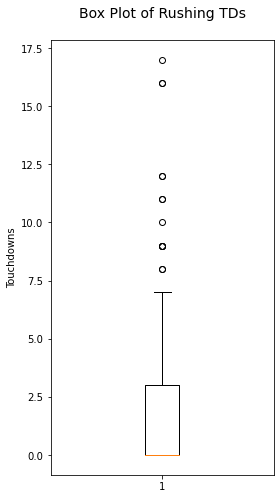

In [16]:
#Checking for outliers

plt.figure(figsize=(4,8))
plt.boxplot(rushing2020['Rushing TDs'])
plt.title('Box Plot of Rushing TDs\n', fontsize=14)
plt.ylabel('Touchdowns')
plt.show()

**Explanation:** It's hard to think that anyone who scored 8 touchdowns or more would be considered an outlier, but when we think about it it makes sense. We included every single running back that had a carry on the season, so inevitably, we will find players with very few carries, including a few that never had a carry. So when we have so many people with only a few carries and only no touchdowns, the skew will be heavily weighted toward the lower end. We won't remove any of this data because when we include all the data across all the years, we will have a lot more data to hold up, and maybe consider removing stuff later. Let's make a histogram to show how far we have this skewed

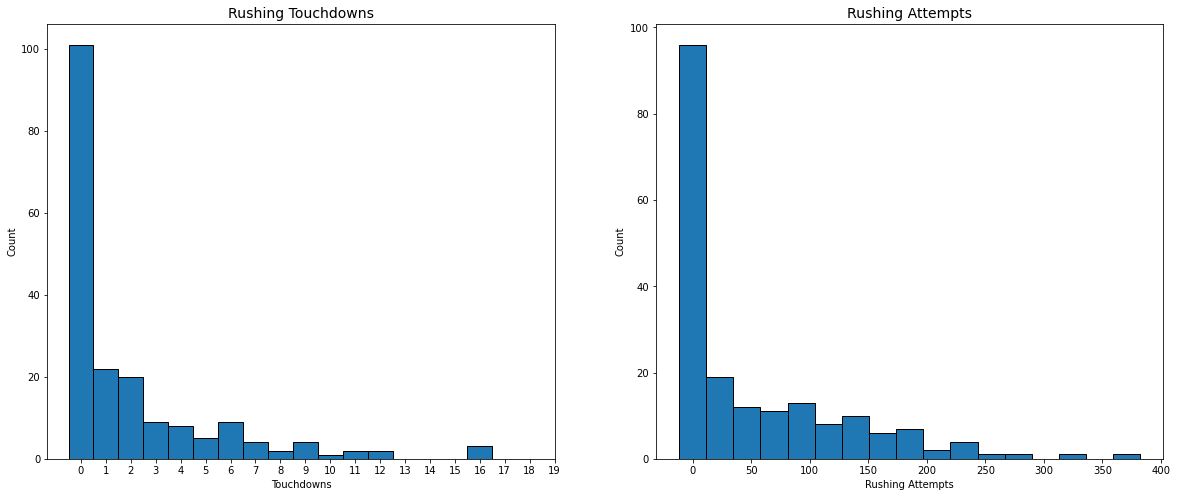

In [24]:
#Making histograms of rushing TDs and rushing attempts.

plt.figure(figsize=(20,8))

plt.subplot(121)
plt.hist(rushing2020['Rushing TDs'], edgecolor='k', bins=17, align='left')
plt.title('Rushing Touchdowns', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Touchdowns')
plt.xticks(range(0,20,1))

plt.subplot(122)
plt.hist(rushing2020['Rushing Attempts'], edgecolor='k', bins=17, align='left')
plt.title('Rushing Attempts', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Rushing Attempts')
plt.show()

**Explanation:** Crazy enough, our rushing attempts and rushing touchdowns histograms look very similar. Which is great, attempts should lead to more touchdowns and will probably be a strong indicator of touchdowns in the model. This is showing on both the short end, of course the people with 0-10 rushing attmepts likely didn't score touchdowns, but also at all aspects of the graph. Also Derrick Henry carried the ball almost 400 times this season... scary.

So unfortunately, I had to use the same year (2020) as my milestone part 3 because the API only had the most recent year for free. So I'll have to take and clean up the 2 years that aren't in my initial Kaggle dataset from the NFL website like I did for part 3, and then I'll have it all. I am a little annoyed with this data because there are lots of... weird points here. Everything is in decimal form, with fractional things that don't make any sense. Stuff like 2.2 touchdowns and 1.1 fumbles. I'm going to try to see if there is any method to it by looking at the stats, but wanted to get this all on here and ready to be combined with the other datasets. I'm also not entirely sure how to combine these, since for some reason full name is not included. So... I'll have to come up with something. If anything, I can manually enter names and it'll be a pain but shouldn't be too hard.